In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
from bokeh.models.widgets import Panel, Tabs
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.models.tools import HoverTool

from statsmodels.tsa.stattools import adfuller 
from numpy import log 

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf


Loading BokehJS ...

In [2]:
! pip install keras

In [3]:
! pip install tensorflow

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams

from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

from sklearn.preprocessing import MinMaxScaler

<a id='1'>
<p style="padding:10px;background-color:#D6AD60;margin:0;color:#122620;font-family:newtimeroman;font-size:240%;text-align:center;border-radius: 15px 20px; overflow:hidden; font-weight:500">1. Data presentation</p>

<p style="text-align:center; "></a></p>

In [53]:
df = pd.read_csv('HistoricalData_apple.csv', parse_dates=['Date'], index_col=['Date'], na_values=['999.99'])

In [54]:
df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2023-03-08,$152.87,47204790,$152.81,$153.47,$151.83
2023-03-07,$151.60,56182030,$153.70,$154.0299,$151.13
2023-03-06,$153.83,87558030,$153.785,$156.30,$153.46
2023-03-03,$151.03,70732300,$148.045,$151.11,$147.33
2023-03-02,$145.91,52279760,$144.38,$146.71,$143.90


In [8]:
df.tail()

,Date,Close/Last,Volume,Open,High,Low
246,03/15/2022,$155.09,92964300,$150.90,$155.57,$150.38
247,03/14/2022,$150.62,108732100,$151.45,$154.12,$150.10
248,03/11/2022,$154.73,96970100,$158.93,$159.28,$154.50
249,03/10/2022,$158.52,105342000,$160.20,$160.39,$155.98
250,03/09/2022,$162.95,91454910,$161.475,$163.41,$159.41


<a id='1.1'></a>
# <font color='#900020'>1.1 Display "Close", "Open", "High" and "Low" share price curves</font>

In [55]:
df = df.replace({'\$':''}, regex = True)


df[['Close/Last', 'Open','High', 'Low']] =  df[['Close/Last', 'Open','High', 'Low']].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-03-08 to 2022-03-09
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close/Last  251 non-null    float64
 1   Volume      251 non-null    int64  
 2   Open        251 non-null    float64
 3   High        251 non-null    float64
 4   Low         251 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


In [56]:
prices = df['2022-03-09':'2023-03-08']
prices.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2023-03-08,152.87,47204790,152.810,153.4700,151.83
2023-03-07,151.60,56182030,153.700,154.0299,151.13
2023-03-06,153.83,87558030,153.785,156.3000,153.46
2023-03-03,151.03,70732300,148.045,151.1100,147.33
2023-03-02,145.91,52279760,144.380,146.7100,143.90


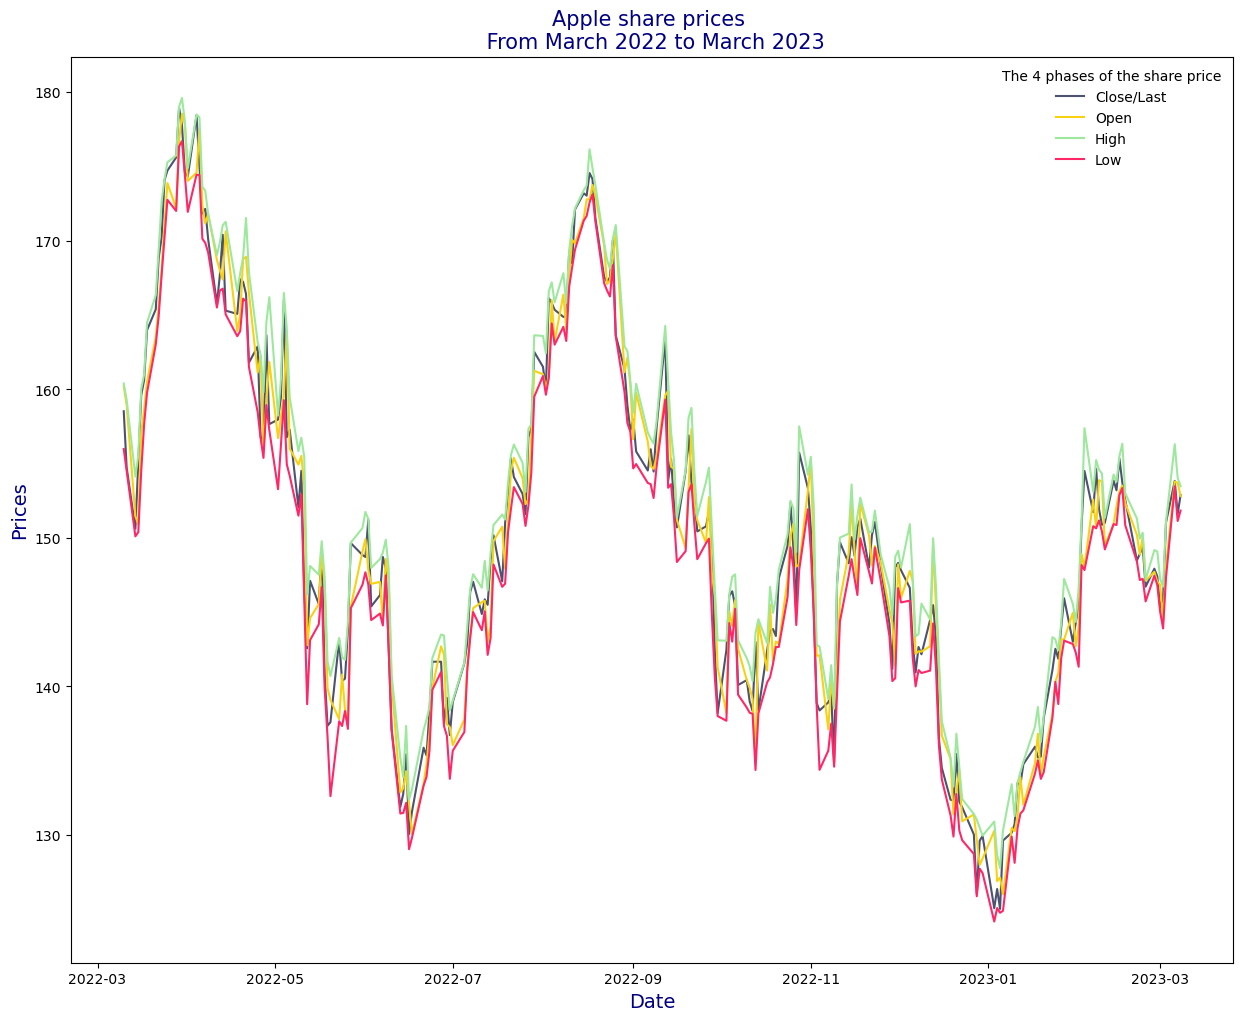

In [57]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(15, 12), dpi=100)

# Add x-axis and y-axis
ax = sns.lineplot(x='Date', y='Close/Last', data=prices, legend=True, color='#4C5270')
ax= sns.lineplot(x='Date', y='Open', data=prices, legend=True, color='#F8D210')
ax = sns.lineplot(x='Date', y='High', data=prices, legend=True, color='#9DE89C')
ax= sns.lineplot(x='Date', y='Low', data=prices, legend=True, color='#FF2768')

# Set title and labels for axes

plt.title("Apple share prices \n From March 2022 to March 2023", color='navy', size=15)
plt.xlabel('Date', size=14, color="navy")
plt.ylabel('Prices', size=14, color='navy')
ax.legend(loc='best', title='The 4 phases of the share price', frameon=False, ncol= 1, 
          labels=['Close/Last', 'Open', 'High', 'Low'])
plt.show();

<a id='1.2'></a>
# <font color='#900020'>1.2 Interactive plot at market close</font>

In [60]:
df1 = pd.read_csv('HistoricalData_apple.csv')
df1 = df1.replace({'\$':''}, regex = True)


df1[['Close/Last', 'Open','High', 'Low']] =  df1[['Close/Last', 'Open','High', 'Low']].astype(float)
df1["Date"] = pd.to_datetime(df1["Date"])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        251 non-null    datetime64[ns]
 1   Close/Last  251 non-null    float64       
 2   Volume      251 non-null    int64         
 3   Open        251 non-null    float64       
 4   High        251 non-null    float64       
 5   Low         251 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 11.9 KB


In [62]:
x = df1['Date']
y = df1['Close/Last']

source1 = ColumnDataSource({'Dates': x, 'Prices Close' : y})

p = figure(width =800, height = 500, x_axis_type='datetime', title="Apple closing share price\nFrom March 2022 to March 2023")

c = p.line(x='Dates', y='Prices Close', source=source1, color='#005BEA')

h = HoverTool (renderers = [c], tooltips = [("Date" , '$x{%F}'),('Price' , '$y'), ("(index)", "($indices)")], 
               formatters={'$x': 'datetime'}) 
p.add_tools(h)

show(p);

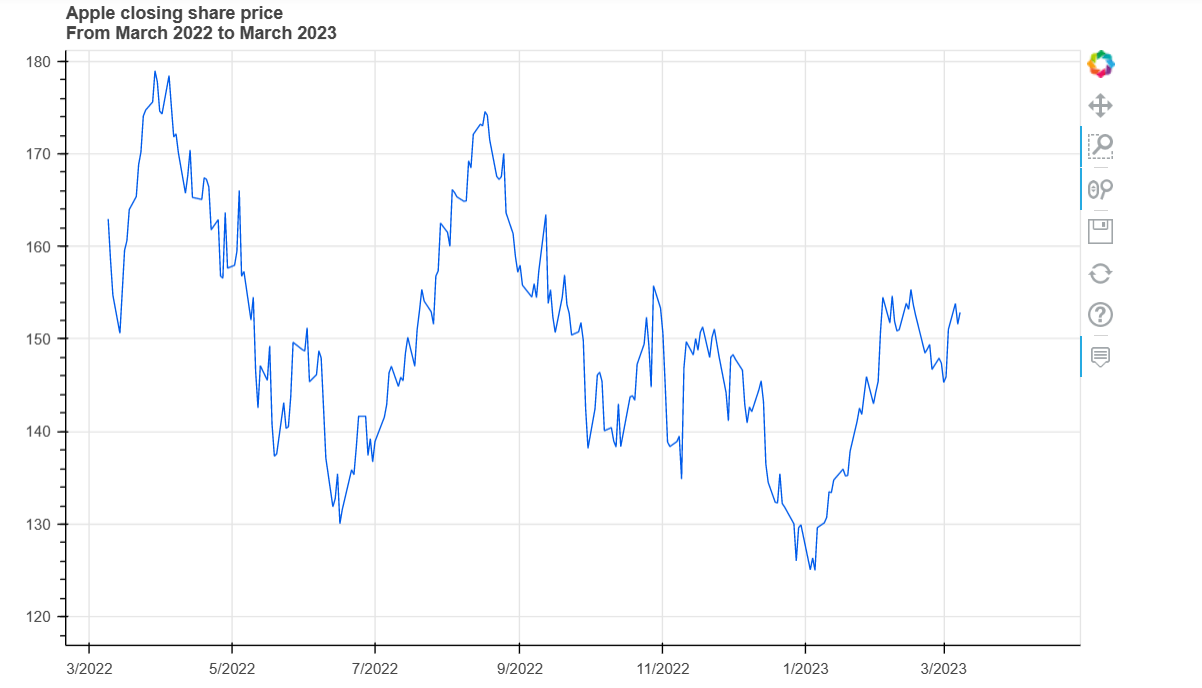

<a id='2'>
<p style="padding:10px;background-color:#D6AD60;margin:0;color:#122620;font-family:newtimeroman;font-size:240%;text-align:center;border-radius: 15px 20px; overflow:hidden; font-weight:500">2. Time series</p>

<p style="text-align:center; "></a></p>

In [63]:
df_stats = df1['Close/Last']
df_stats.index = df1['Date']
df_stats.sort_index(ascending=True, inplace=True)
df_stats

Date
2022-03-09    162.95
2022-03-10    158.52
2022-03-11    154.73
2022-03-14    150.62
2022-03-15    155.09
               ...  
2023-03-02    145.91
2023-03-03    151.03
2023-03-06    153.83
2023-03-07    151.60
2023-03-08    152.87
Name: Close/Last, Length: 251, dtype: float64

In [64]:
df_stats.index

DatetimeIndex(['2022-03-09', '2022-03-10', '2022-03-11', '2022-03-14',
               '2022-03-15', '2022-03-16', '2022-03-17', '2022-03-18',
               '2022-03-21', '2022-03-22',
               ...
               '2023-02-23', '2023-02-24', '2023-02-27', '2023-02-28',
               '2023-03-01', '2023-03-02', '2023-03-03', '2023-03-06',
               '2023-03-07', '2023-03-08'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

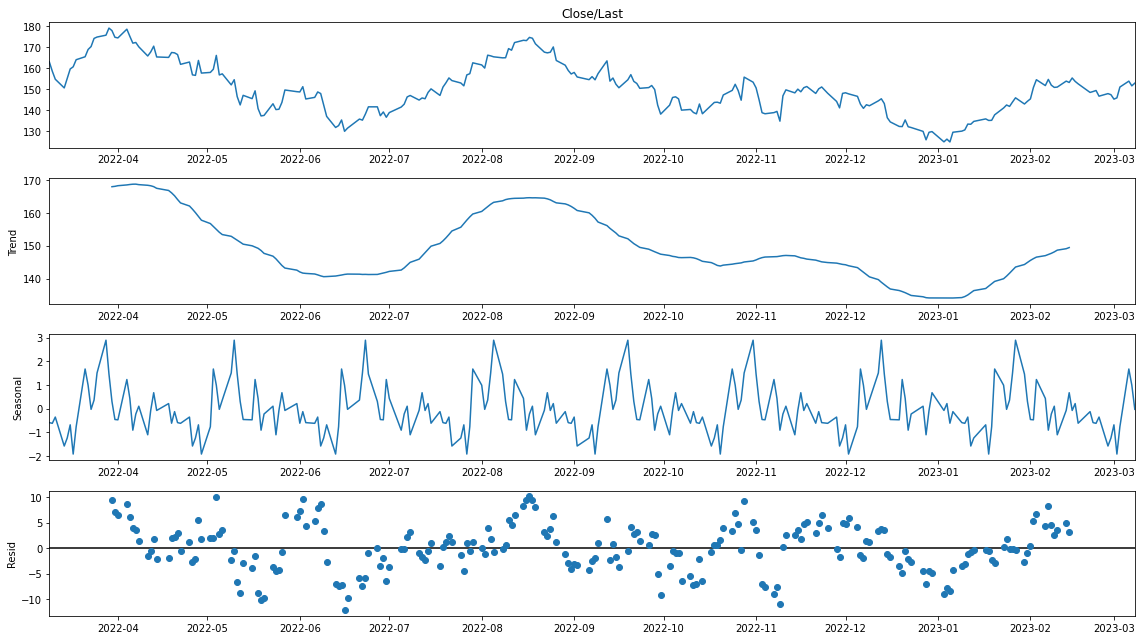

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive model
sd = seasonal_decompose(df_stats, model='additive', filt=None, period=30)
fig = sd.plot()
fig.set_size_inches((16,9))
fig.tight_layout()
plt.show();

**The residual shows great variations as a function of time. In theory, a decomposition is considered successful if the residual part can be assimilated to what is known as weak white noise. However, data from the additive model show a high degree of volatility over a year of observation. This should be taken into account when developing a forecasting model for this series. I'm going to use the multiplicative model to see if the residual is better.**

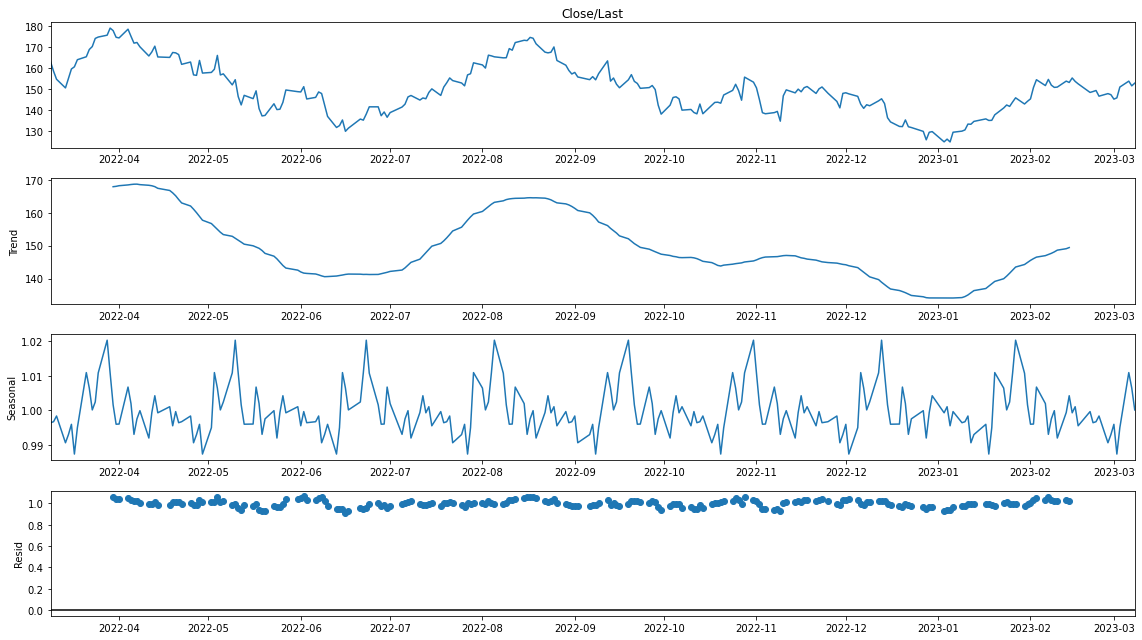

In [66]:
# Multiplicative model
sd = seasonal_decompose(df_stats, model='multiplicative', filt=None, period=30)
fig = sd.plot()
fig.set_size_inches((16,9))
fig.tight_layout()
plt.show();

<a id='2.1'></a>
# <font color='#900020'>2.1 AD Fuller test</font>

In [68]:
def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistic','p-value']
    for value,label in zip(result,labels):
        print(label  + ': ' + str(value))
    if result[1]<=0.05:
        print('Strong evidence against the null hypothesis, hence REJECT Ho. and The series is Stationary')
    else:
        print('Weak evidence against null hypothesis, hence ACCEPT Ho. that the series is not stationary.')

In [69]:
adfuller_test(df_stats)

ADF Test Statistic: -2.3173744534406446
p-value: 0.16642557813516728
Weak evidence against null hypothesis, hence ACCEPT Ho. that the series is not stationary.


<a id='2.2'></a>
# <font color='#900020'>2.2 Autocorrelation with plot_pacf and plot_acf</font>

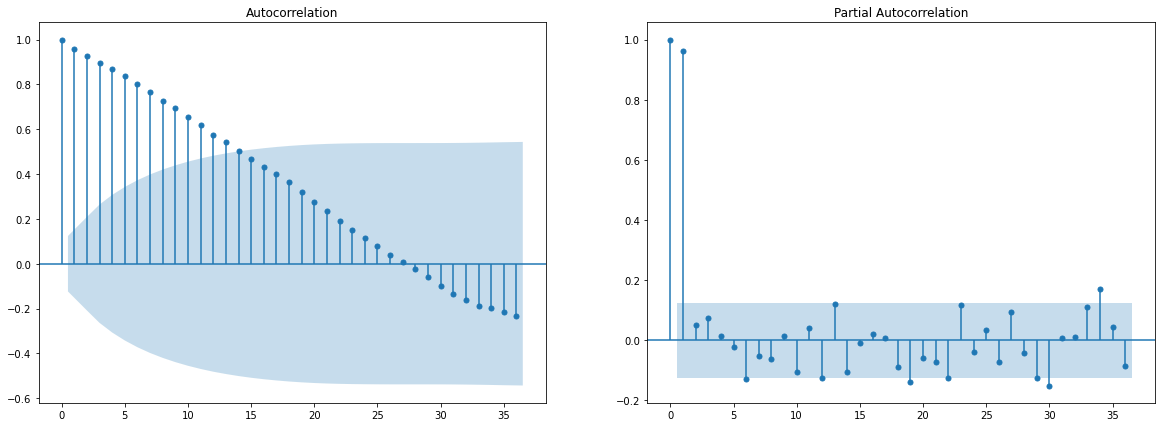

In [71]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))

plot_acf(df_stats, lags = 36, ax=ax1)
plot_pacf(df_stats, lags = 36, ax=ax2) 
plt.show();

In [73]:
model=sm.tsa.SARIMAX(df_stats,order=(1,1,1),seasonal_order=(0,1,1,36))
sarima=model.fit()
print(sarima.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                                     SARIMAX Results                                      
Dep. Variable:                         Close/Last   No. Observations:                  251
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 36)   Log Likelihood                -588.391
Date:                            Thu, 22 Jun 2023   AIC                           1184.781
Time:                                    15:43:46   BIC                           1198.245
Sample:                                         0   HQIC                          1190.222
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8900      0.065    -13.701      0.000      -1.017      -0.763
ma.L1          0.9677      0.046   

The Ljung-Box test is a residual whiteness test. It is a statistical test that aims to reject or not the hypothesis H0: The residual is white noise. Here, the Prob(Q) line shows that the p-value of this test is 0.42, so the hypothesis is not rejected.

The Jarque-Bera test is a normality test. It is a statistical test designed to reject or not the hypothesis H0: The residual follows a normal distribution. Here we read on the Prob (JB) line that the p-value of the test is 0.10. The hypothesis is therefore not rejected.

<a id='3'>
<p style="padding:10px;background-color:#D6AD60;margin:0;color:#122620;font-family:newtimeroman;font-size:240%;text-align:center;border-radius: 15px 20px; overflow:hidden; font-weight:500">3. Application of LSTM model</p>

<p style="text-align:center; "></a></p>

In [75]:
df_LSTM = pd.DataFrame(df1['Close/Last'])
df_LSTM

,Close/Last
Date,
2022-03-09,162.95
2022-03-10,158.52
2022-03-11,154.73
2022-03-14,150.62
2022-03-15,155.09
...,...
2023-03-02,145.91
2023-03-03,151.03
2023-03-06,153.83


In [76]:
scaler=MinMaxScaler(feature_range=(0,1))

In [77]:
final_data = df_LSTM.values
train_data= pd.DataFrame(final_data[0:200,:], columns=['values'])
valid_data= pd.DataFrame(final_data[200:,:], columns=['values'])


In [78]:
final_data

array([[162.95],
       [158.52],
       [154.73],
       [150.62],
       [155.09],
       [159.59],
       [160.62],
       [163.98],
       [165.38],
       [168.82],
       [170.21],
       [174.07],
       [174.72],
       [175.6 ],
       [178.96],
       [177.77],
       [174.61],
       [174.31],
       [178.44],
       [175.06],
       [171.83],
       [172.14],
       [170.09],
       [165.75],
       [167.66],
       [170.4 ],
       [165.29],
       [165.07],
       [167.4 ],
       [167.23],
       [166.42],
       [161.79],
       [162.88],
       [156.8 ],
       [156.57],
       [163.64],
       [157.65],
       [157.96],
       [159.48],
       [166.02],
       [156.77],
       [157.28],
       [152.06],
       [154.51],
       [146.5 ],
       [142.56],
       [147.11],
       [145.54],
       [149.24],
       [140.82],
       [137.35],
       [137.59],
       [143.11],
       [140.36],
       [140.52],
       [143.78],
       [149.64],
       [148.84],
       [148.71

In [80]:
train_data

,values
0,162.95
1,158.52
2,154.73
3,150.62
4,155.09
...,...
195,136.50
196,134.51
197,132.37
198,132.30


In [81]:
train_data.shape

(200, 1)

In [82]:
valid_data

,values
0,132.23
1,131.86
2,130.03
3,126.04
4,129.61
5,129.93
6,125.07
7,126.36
8,125.02
9,129.62


In [83]:
valid_data.shape

(51, 1)

In [84]:
scaled_data=scaler.fit_transform(final_data)
x_train_data,y_train_data=[],[]
for i in range(51,len(train_data)):
    x_train_data.append(scaled_data[i-51:i,0]) # 51 correspond au nombre de lignes dans valid data
    y_train_data.append(scaled_data[i,0])

In [85]:
x_train_data = pd.DataFrame(x_train_data)

In [86]:
y_train_data = pd.DataFrame(y_train_data)

In [87]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=40,return_sequences=True,input_shape=(np.shape(x_train_data)[1],1)))
lstm_model.add(LSTM(units=40))
lstm_model.add(Dense(1))


In [88]:
model_data=final_data[len(final_data)-len(valid_data)-51:]
model_data

array([[138.98],
       [138.34],
       [142.99],
       [138.38],
       [142.41],
       [143.75],
       [143.86],
       [143.39],
       [147.27],
       [149.45],
       [152.34],
       [149.35],
       [144.8 ],
       [155.74],
       [153.34],
       [150.65],
       [145.03],
       [138.88],
       [138.38],
       [138.92],
       [139.5 ],
       [134.87],
       [146.87],
       [149.7 ],
       [148.28],
       [150.04],
       [148.79],
       [150.72],
       [151.29],
       [148.01],
       [150.18],
       [151.07],
       [148.11],
       [144.22],
       [141.17],
       [148.03],
       [148.31],
       [147.81],
       [146.63],
       [142.91],
       [140.94],
       [142.65],
       [142.16],
       [144.49],
       [145.47],
       [143.21],
       [136.5 ],
       [134.51],
       [132.37],
       [132.3 ],
       [135.45],
       [132.23],
       [131.86],
       [130.03],
       [126.04],
       [129.61],
       [129.93],
       [125.07],
       [126.36

In [89]:
model_data = model_data.reshape(-1,1)
model_data = scaler.transform(model_data)

In [90]:
model_data

array([[0.25880608],
       [0.24694105],
       [0.33314794],
       [0.24768261],
       [0.32239525],
       [0.34723767],
       [0.34927697],
       [0.34056359],
       [0.41249537],
       [0.45291064],
       [0.50648869],
       [0.45105673],
       [0.36670374],
       [0.56952169],
       [0.52502781],
       [0.47515758],
       [0.37096774],
       [0.25695217],
       [0.24768261],
       [0.25769373],
       [0.26844642],
       [0.18261031],
       [0.40507972],
       [0.45754542],
       [0.43121987],
       [0.46384872],
       [0.44067482],
       [0.47645532],
       [0.48702262],
       [0.42621431],
       [0.4664442 ],
       [0.48294401],
       [0.42806822],
       [0.35595106],
       [0.29940675],
       [0.42658509],
       [0.43177605],
       [0.42250649],
       [0.40063033],
       [0.33166481],
       [0.29514275],
       [0.32684464],
       [0.31776047],
       [0.36095662],
       [0.37912495],
       [0.33722655],
       [0.21282907],
       [0.175

In [91]:
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data, epochs=1,batch_size=1,verbose=2)


149/149 - 8s - loss: 0.0250 - 8s/epoch - 57ms/step


In [92]:
X_test=[]
for i in range(51,model_data.shape[0]):
    X_test.append(model_data[i-51:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [93]:
X_test

array([[[0.25880608],
        [0.24694105],
        [0.33314794],
        ...,
        [0.13626251],
        [0.13496478],
        [0.193363  ]],

       [[0.24694105],
        [0.33314794],
        [0.24768261],
        ...,
        [0.13496478],
        [0.193363  ],
        [0.13366704]],

       [[0.33314794],
        [0.24768261],
        [0.32239525],
        ...,
        [0.193363  ],
        [0.13366704],
        [0.12680756]],

       ...,

       [[0.13626251],
        [0.13496478],
        [0.193363  ],
        ...,
        [0.37615869],
        [0.38728217],
        [0.48220245]],

       [[0.13496478],
        [0.193363  ],
        [0.13366704],
        ...,
        [0.38728217],
        [0.48220245],
        [0.53411198]],

       [[0.193363  ],
        [0.13366704],
        [0.12680756],
        ...,
        [0.48220245],
        [0.53411198],
        [0.49276974]]])

In [94]:
X_test.shape

(51, 51, 1)

In [95]:
predicted_stock_price = lstm_model.predict(X_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)

2/2 [==============================] - 1s 12ms/step


In [96]:
valid_data['Predictions']=predicted_stock_price
valid_data

,values,Predictions
0,132.23,141.243942
1,131.86,140.319305
2,130.03,139.431793
3,126.04,138.535629
4,129.61,137.510574
5,129.93,136.625870
6,125.07,135.887619
7,126.36,135.074112
8,125.02,134.322891
9,129.62,133.594681


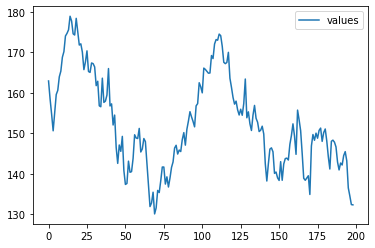

In [97]:
train_data = pd.DataFrame(final_data[:199],columns=['values'])
train_data.plot();

In [98]:
train_data

,values
0,162.95
1,158.52
2,154.73
3,150.62
4,155.09
...,...
194,143.21
195,136.50
196,134.51
197,132.37


In [99]:
valid_data= pd.DataFrame(final_data[200:],columns=['values'])
valid_data['Predictions']=predicted_stock_price
valid_data['Index'] = np.arange(200, 251, 1)
valid_data.set_index('Index', inplace=True)
valid_data

,values,Predictions
Index,,
200,132.23,141.243942
201,131.86,140.319305
202,130.03,139.431793
203,126.04,138.535629
204,129.61,137.510574
205,129.93,136.625870
206,125.07,135.887619
207,126.36,135.074112
208,125.02,134.322891


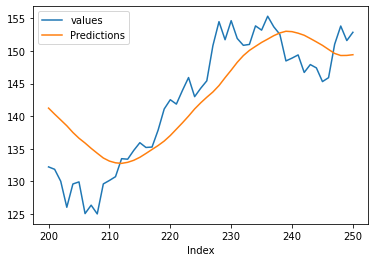

In [100]:
valid_data.plot();

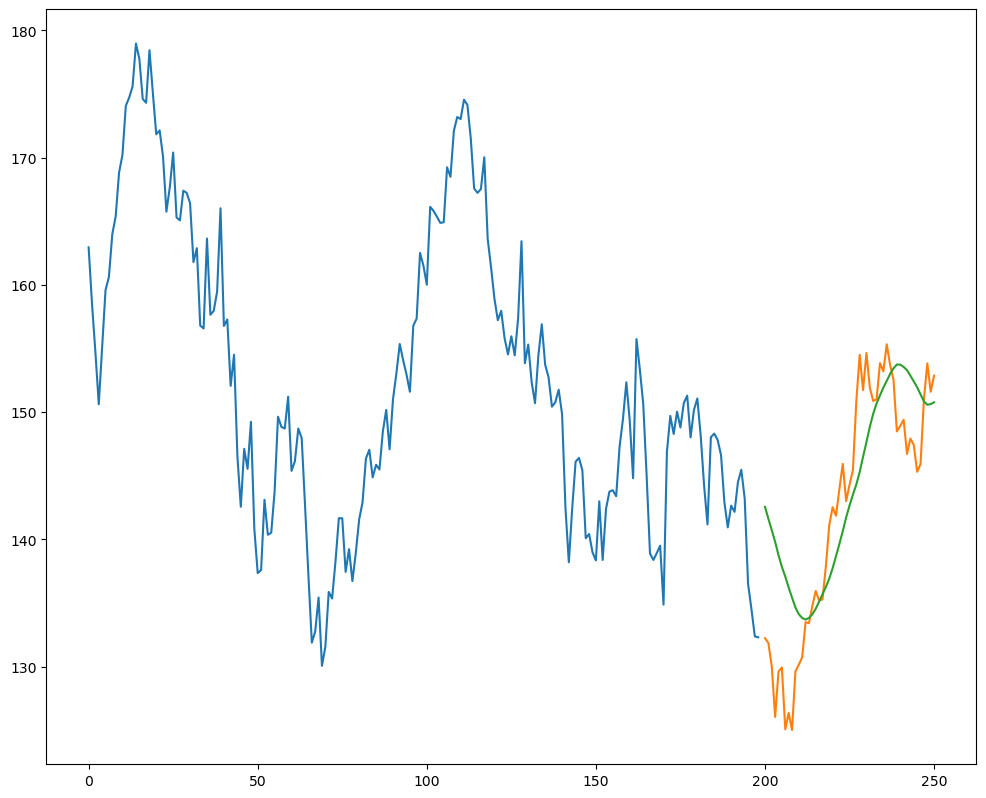

In [100]:
plt.figure(figsize=(12,10), dpi=100)
plt.plot(train_data["values"])
plt.plot(valid_data[['values',"Predictions"]]);